# Image Classification
In this project, you'll classify images from the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html).  The dataset consists of airplanes, dogs, cats, and other objects. You'll preprocess the images, then train a convolutional neural network on all the samples. The images need to be normalized and the labels need to be one-hot encoded.  You'll get to apply what you learned and build a convolutional, max pooling, dropout, and fully connected layers.  At the end, you'll get to see your neural network's predictions on the sample images.
## Get the Data
Run the following cell to download the [CIFAR-10 dataset for python](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz).

In [1]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
from urllib.request import urlretrieve
from os.path import isfile, isdir
from tqdm import tqdm
import problem_unittests as tests
import tarfile

cifar10_dataset_folder_path = 'cifar-10-batches-py'

class DLProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

if not isfile('cifar-10-python.tar.gz'):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='CIFAR-10 Dataset') as pbar:
        urlretrieve(
            'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz',
            'cifar-10-python.tar.gz',
            pbar.hook)

if not isdir(cifar10_dataset_folder_path):
    with tarfile.open('cifar-10-python.tar.gz') as tar:
        tar.extractall()
        tar.close()


tests.test_folder_path(cifar10_dataset_folder_path)

All files found!


## Explore the Data
The dataset is broken into batches to prevent your machine from running out of memory.  The CIFAR-10 dataset consists of 5 batches, named `data_batch_1`, `data_batch_2`, etc.. Each batch contains the labels and images that are one of the following:
* airplane
* automobile
* bird
* cat
* deer
* dog
* frog
* horse
* ship
* truck

Understanding a dataset is part of making predictions on the data.  Play around with the code cell below by changing the `batch_id` and `sample_id`. The `batch_id` is the id for a batch (1-5). The `sample_id` is the id for a image and label pair in the batch.

Ask yourself "What are all possible labels?", "What is the range of values for the image data?", "Are the labels in order or random?".  Answers to questions like these will help you preprocess the data and end up with better predictions.


Stats of batch 1:
Samples: 10000
Label Counts: {0: 1005, 1: 974, 2: 1032, 3: 1016, 4: 999, 5: 937, 6: 1030, 7: 1001, 8: 1025, 9: 981}
First 20 Labels: [6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6]

Example of Image 5:
Image - Min Value: 0 Max Value: 252
Image - Shape: (32, 32, 3)
Label - Label Id: 1 Name: automobile


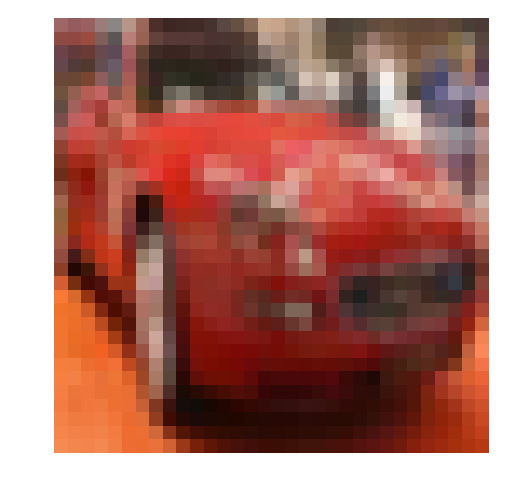

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper
import numpy as np

# Explore the dataset
batch_id = 1
sample_id = 5
helper.display_stats(cifar10_dataset_folder_path, batch_id, sample_id)

## Implement Preprocess Functions
### Normalize
In the cell below, implement the `normalize` function to take in image data, `x`, and return it as a normalized Numpy array. The values should be in the range of 0 to 1, inclusive.  The return object should be the same shape as `x`.

In [3]:
def normalize(x):
    """
    Normalize a list of sample image data in the range of 0 to 1
    : x: List of image data.  The image shape is (32, 32, 3)
    : return: Numpy array of normalize data
    """
    # TODO: Implement Function
    return x/255


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_normalize(normalize)

Tests Passed


### One-hot encode
Just like the previous code cell, you'll be implementing a function for preprocessing.  This time, you'll implement the `one_hot_encode` function. The input, `x`, are a list of labels.  Implement the function to return the list of labels as One-Hot encoded Numpy array.  The possible values for labels are 0 to 9. The one-hot encoding function should return the same encoding for each value between each call to `one_hot_encode`.  Make sure to save the map of encodings outside the function.

**Hint:**

Look into LabelBinarizer in the preprocessing module of sklearn.

In [6]:
def one_hot_encode(x):
    """
    One hot encode a list of sample labels. Return a one-hot encoded vector for each label.
    : x: List of sample Labels
    : return: Numpy array of one-hot encoded labels
    """
    
    # TODO: Implement Function
    return np.eye(10)[x]


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_one_hot_encode(one_hot_encode)

Tests Passed


### Randomize Data
As you saw from exploring the data above, the order of the samples are randomized.  It doesn't hurt to randomize it again, but you don't need to for this dataset.

## Preprocess all the data and save it
Running the code cell below will preprocess all the CIFAR-10 data and save it to file. The code below also uses 10% of the training data for validation.

In [7]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
# Preprocess Training, Validation, and Testing Data
helper.preprocess_and_save_data(cifar10_dataset_folder_path, normalize, one_hot_encode)

# Check Point
This is your first checkpoint.  If you ever decide to come back to this notebook or have to restart the notebook, you can start from here.  The preprocessed data has been saved to disk.

In [8]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import pickle
import problem_unittests as tests
import helper

# Load the Preprocessed Validation data
valid_features, valid_labels = pickle.load(open('preprocess_validation.p', mode='rb'))

## Build the network
For the neural network, you'll build each layer into a function.  Most of the code you've seen has been outside of functions. To test your code more thoroughly, we require that you put each layer in a function.  This allows us to give you better feedback and test for simple mistakes using our unittests before you submit your project.

>**Note:** If you're finding it hard to dedicate enough time for this course each week, we've provided a small shortcut to this part of the project. In the next couple of problems, you'll have the option to use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages to build each layer, except the layers you build in the "Convolutional and Max Pooling Layer" section.  TF Layers is similar to Keras's and TFLearn's abstraction to layers, so it's easy to pickup.

>However, if you would like to get the most out of this course, try to solve all the problems _without_ using anything from the TF Layers packages. You **can** still use classes from other packages that happen to have the same name as ones you find in TF Layers! For example, instead of using the TF Layers version of the `conv2d` class, [tf.layers.conv2d](https://www.tensorflow.org/api_docs/python/tf/layers/conv2d), you would want to use the TF Neural Network version of `conv2d`, [tf.nn.conv2d](https://www.tensorflow.org/api_docs/python/tf/nn/conv2d). 

Let's begin!

### Input
The neural network needs to read the image data, one-hot encoded labels, and dropout keep probability. Implement the following functions
* Implement `neural_net_image_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `image_shape` with batch size set to `None`.
 * Name the TensorFlow placeholder "x" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_label_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `n_classes` with batch size set to `None`.
 * Name the TensorFlow placeholder "y" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_keep_prob_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder) for dropout keep probability.
 * Name the TensorFlow placeholder "keep_prob" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).

These names will be used at the end of the project to load your saved model.

Note: `None` for shapes in TensorFlow allow for a dynamic size.

In [9]:
import tensorflow as tf

def neural_net_image_input(image_shape):
    """
    Return a Tensor for a batch of image input
    : image_shape: Shape of the images
    : return: Tensor for image input.
    """
    # TODO: Implement Function
    return tf.placeholder(dtype=tf.float32,shape=(None,*image_shape),name='x')


def neural_net_label_input(n_classes):
    """
    Return a Tensor for a batch of label input
    : n_classes: Number of classes
    : return: Tensor for label input.
    """
    # TODO: Implement Function
    return tf.placeholder(dtype=tf.float32,shape=(None,n_classes),name='y')


def neural_net_keep_prob_input():
    """
    Return a Tensor for keep probability
    : return: Tensor for keep probability.
    """
    # TODO: Implement Function
    return tf.placeholder(dtype=tf.float32,name='keep_prob')


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tf.reset_default_graph()
tests.test_nn_image_inputs(neural_net_image_input)
tests.test_nn_label_inputs(neural_net_label_input)
tests.test_nn_keep_prob_inputs(neural_net_keep_prob_input)

Image Input Tests Passed.
Label Input Tests Passed.
Keep Prob Tests Passed.


### Convolution and Max Pooling Layer
Convolution layers have a lot of success with images. For this code cell, you should implement the function `conv2d_maxpool` to apply convolution then max pooling:
* Create the weight and bias using `conv_ksize`, `conv_num_outputs` and the shape of `x_tensor`.
* Apply a convolution to `x_tensor` using weight and `conv_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.
* Add bias
* Add a nonlinear activation to the convolution.
* Apply Max Pooling using `pool_ksize` and `pool_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.

**Note:** You **can't** use [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) for **this** layer, but you can still use TensorFlow's [Neural Network](https://www.tensorflow.org/api_docs/python/tf/nn) package. You may still use the shortcut option for all the **other** layers.

** Hint: **

When unpacking values as an argument in Python, look into the [unpacking](https://docs.python.org/3/tutorial/controlflow.html#unpacking-argument-lists) operator. 

In [11]:
def conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides):
    """
    Apply convolution then max pooling to x_tensor
    :param x_tensor: TensorFlow Tensor
    :param conv_num_outputs: Number of outputs for the convolutional layer
    :param conv_ksize: kernal size 2-D Tuple for the convolutional layer
    :param conv_strides: Stride 2-D Tuple for convolution
    :param pool_ksize: kernal size 2-D Tuple for pool
    :param pool_strides: Stride 2-D Tuple for pool
    : return: A tensor that represents convolution and max pooling of x_tensor
    """
    # TODO: Implement Function
    weight_shape = [*conv_ksize,x_tensor.get_shape().as_list()[-1],conv_num_outputs]
    # using Xavier initialization
    weight = tf.Variable(np.random.randn(*weight_shape)*np.sqrt(2/np.prod(weight_shape)),dtype=tf.float32)
    bias = tf.Variable(tf.zeros(conv_num_outputs))
    
    conv_layer = tf.nn.conv2d(x_tensor,weight,strides=[1,*conv_strides,1],padding='SAME')
    conv_layer = tf.nn.bias_add(conv_layer,bias)
    conv_layer = tf.nn.relu(conv_layer)
    
    pool_layer = tf.nn.max_pool(conv_layer,[1,*pool_ksize,1],[1,*pool_strides,1],padding='VALID')
    
    return pool_layer 


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_con_pool(conv2d_maxpool)

Tests Passed


### Flatten Layer
Implement the `flatten` function to change the dimension of `x_tensor` from a 4-D tensor to a 2-D tensor.  The output should be the shape (*Batch Size*, *Flattened Image Size*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [12]:
def flatten(x_tensor):
    """
    Flatten x_tensor to (Batch Size, Flattened Image Size)
    : x_tensor: A tensor of size (Batch Size, ...), where ... are the image dimensions.
    : return: A tensor of size (Batch Size, Flattened Image Size).
    """
    # TODO: Implement Function
    s = x_tensor.shape
    return tf.reshape(x_tensor,[-1,s[1]*s[2]*s[3]])


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_flatten(flatten)

Tests Passed


### Fully-Connected Layer
Implement the `fully_conn` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [14]:
def fully_conn(x_tensor, num_outputs):
    """
    Apply a fully connected layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    s = x_tensor.get_shape().as_list()
    weight_shape = [s[1],num_outputs]
    # using Xavier initialization
    weight = tf.Variable(np.random.randn(*weight_shape)*np.sqrt(2/np.prod(weight_shape)),dtype=tf.float32)
    bias = tf.Variable(tf.zeros(num_outputs))
    fc_layer = tf.nn.relu(tf.nn.bias_add(tf.matmul(x_tensor,weight),bias))
    return fc_layer


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_fully_conn(fully_conn)

Tests Passed


### Output Layer
Implement the `output` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

**Note:** Activation, softmax, or cross entropy should **not** be applied to this.

In [15]:
def output(x_tensor, num_outputs):
    """
    Apply a output layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    s = x_tensor.get_shape().as_list()
    weight_shape = [s[1],num_outputs]
    # using Xavier initialization
    weight = tf.Variable(np.random.randn(*weight_shape)*np.sqrt(2/np.prod(weight_shape)),dtype=tf.float32)
    bias = tf.Variable(tf.zeros(num_outputs))
    o_layer = tf.nn.bias_add(tf.matmul(x_tensor,weight),bias)
    return o_layer


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_output(output)

Tests Passed


### Create Convolutional Model
Implement the function `conv_net` to create a convolutional neural network model. The function takes in a batch of images, `x`, and outputs logits.  Use the layers you created above to create this model:

* Apply 1, 2, or 3 Convolution and Max Pool layers
* Apply a Flatten Layer
* Apply 1, 2, or 3 Fully Connected Layers
* Apply an Output Layer
* Return the output
* Apply [TensorFlow's Dropout](https://www.tensorflow.org/api_docs/python/tf/nn/dropout) to one or more layers in the model using `keep_prob`. 

In [25]:
def conv_net(x, keep_prob=1):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    # TODO: Apply 1, 2, or 3 Convolution and Max Pool layers
    #    Play around with different number of outputs, kernel size and stride
    # Function Definition from Above:
    #    conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    conv = conv2d_maxpool(x_tensor=x,
                   conv_num_outputs=64, conv_ksize=[5,5],
                   conv_strides=[1,1], pool_ksize=[2,2],
                   pool_strides=[2,2])
    conv = tf.nn.dropout(conv,keep_prob)
    conv = conv2d_maxpool(x_tensor=conv,
                   conv_num_outputs=128, conv_ksize=[5,5],
                   conv_strides=[1,1], pool_ksize=[2,2],
                   pool_strides=[2,2])
    conv = tf.nn.dropout(conv,keep_prob)
    conv = conv2d_maxpool(x_tensor=conv,
                   conv_num_outputs=256, conv_ksize=[3,3],
                   conv_strides=[1,1], pool_ksize=[2,2],
                   pool_strides=[2,2])
    conv = tf.nn.dropout(conv,keep_prob)

    # TODO: Apply a Flatten Layer
    # Function Definition from Above:
    #   flatten(x_tensor)
    flt = flatten(conv)

    # TODO: Apply 1, 2, or 3 Fully Connected Layers
    #    Play around with different number of outputs
    # Function Definition from Above:
    #   fully_conn(x_tensor, num_outputs)
#     flt = fully_conn(flt, 2056)
#     flt = tf.nn.dropout(flt,keep_prob)
    flt = fully_conn(flt, 512)
    flt = tf.nn.dropout(flt,keep_prob)
    flt = fully_conn(flt, 64)
    flt = tf.nn.dropout(flt,keep_prob)
    
    # TODO: Apply an Output Layer
    #    Set this to the number of classes
    # Function Definition from Above:
    #   output(x_tensor, num_outputs)
    flt = output(flt, 10)
    
    # TODO: return output
    return flt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

##############################
## Build the Neural Network ##
##############################

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = neural_net_image_input((32, 32, 3))
y = neural_net_label_input(10)
keep_prob = neural_net_keep_prob_input()

# Model
logits = conv_net(x, keep_prob)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

tests.test_conv_net(conv_net)

Neural Network Built!


## Train the Neural Network
### Single Optimization
Implement the function `train_neural_network` to do a single optimization.  The optimization should use `optimizer` to optimize in `session` with a `feed_dict` of the following:
* `x` for image input
* `y` for labels
* `keep_prob` for keep probability for dropout

This function will be called for each batch, so `tf.global_variables_initializer()` has already been called.

Note: Nothing needs to be returned. This function is only optimizing the neural network.

In [26]:
def train_neural_network(session, optimizer, keep_probability, feature_batch, label_batch):
    """
    Optimize the session on a batch of images and labels
    : session: Current TensorFlow session
    : optimizer: TensorFlow optimizer function
    : keep_probability: keep probability
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    """
    # TODO: Implement Function    
    session.run(optimizer,feed_dict={x:feature_batch,y:label_batch,keep_prob:keep_probability})


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_train_nn(train_neural_network)

Tests Passed


### Show Stats
Implement the function `print_stats` to print loss and validation accuracy.  Use the global variables `valid_features` and `valid_labels` to calculate validation accuracy.  Use a keep probability of `1.0` to calculate the loss and validation accuracy.

In [27]:
def print_stats(session, feature_batch, label_batch, cost, accuracy):
    """
    Print information about loss and validation accuracy
    : session: Current TensorFlow session
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    : cost: TensorFlow cost function
    : accuracy: TensorFlow accuracy function
    """
    # TODO: Implement Function
    val_cost,val_accuracy = session.run([cost,accuracy],feed_dict = {x:valid_features,y:valid_labels,keep_prob:1})
    train_cost,train_accuracy = session.run([cost,accuracy],feed_dict = {x:feature_batch,y:label_batch,keep_prob:1})
    print(f'training cost = {train_cost}, training accuracy = {train_accuracy}')
    print(f'validation cost = {val_cost}, validation accuracy={val_accuracy}')
    print("=======================================")

### Hyperparameters
Tune the following parameters:
* Set `epochs` to the number of iterations until the network stops learning or start overfitting
* Set `batch_size` to the highest number that your machine has memory for.  Most people set them to common sizes of memory:
 * 64
 * 128
 * 256
 * ...
* Set `keep_probability` to the probability of keeping a node using dropout

In [28]:
# TODO: Tune Parameters
epochs = 80
batch_size = 512
keep_probability = 0.7

### Train on a Single CIFAR-10 Batch
Instead of training the neural network on all the CIFAR-10 batches of data, let's use a single batch. This should save time while you iterate on the model to get a better accuracy.  Once the final validation accuracy is 50% or greater, run the model on all the data in the next section.

In [29]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('Epoch {:>2}, CIFAR-10 Batch {}:  \n'.format(epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)

Checking the Training on a Single Batch...
Epoch  1, CIFAR-10 Batch 1:  
training cost = 2.303116798400879, training accuracy = 0.0878378376364708
validation cost = 2.3027045726776123, validation accuracy=0.0997999981045723
Epoch  2, CIFAR-10 Batch 1:  
training cost = 2.276688814163208, training accuracy = 0.12837837636470795
validation cost = 2.280144214630127, validation accuracy=0.12080000340938568
Epoch  3, CIFAR-10 Batch 1:  
training cost = 2.1855273246765137, training accuracy = 0.19256757199764252
validation cost = 2.190512180328369, validation accuracy=0.16779999434947968
Epoch  4, CIFAR-10 Batch 1:  
training cost = 2.1095645427703857, training accuracy = 0.18243242800235748
validation cost = 2.101680040359497, validation accuracy=0.19979999959468842
Epoch  5, CIFAR-10 Batch 1:  
training cost = 2.0780489444732666, training accuracy = 0.2567567527294159
validation cost = 2.0690298080444336, validation accuracy=0.22339999675750732
Epoch  6, CIFAR-10 Batch 1:  
training cost =

Epoch 38, CIFAR-10 Batch 1:  
training cost = 1.3047672510147095, training accuracy = 0.5472972989082336
validation cost = 1.3927017450332642, validation accuracy=0.48559999465942383
Epoch 39, CIFAR-10 Batch 1:  
training cost = 1.313092827796936, training accuracy = 0.5472972989082336
validation cost = 1.3986252546310425, validation accuracy=0.48539999127388
Epoch 40, CIFAR-10 Batch 1:  
training cost = 1.3123812675476074, training accuracy = 0.5506756901741028
validation cost = 1.4079231023788452, validation accuracy=0.4691999852657318
Epoch 41, CIFAR-10 Batch 1:  
training cost = 1.2900331020355225, training accuracy = 0.5472972989082336
validation cost = 1.4035537242889404, validation accuracy=0.4702000021934509
Epoch 42, CIFAR-10 Batch 1:  
training cost = 1.275186538696289, training accuracy = 0.5641891956329346
validation cost = 1.3687628507614136, validation accuracy=0.4957999885082245
Epoch 43, CIFAR-10 Batch 1:  
training cost = 1.239066243171692, training accuracy = 0.574324

training cost = 0.904229462146759, training accuracy = 0.7263513803482056
validation cost = 1.2903482913970947, validation accuracy=0.5302000045776367
Epoch 76, CIFAR-10 Batch 1:  
training cost = 0.8775808215141296, training accuracy = 0.7263513803482056
validation cost = 1.256608247756958, validation accuracy=0.5465999841690063
Epoch 77, CIFAR-10 Batch 1:  
training cost = 0.8519041538238525, training accuracy = 0.7263513803482056
validation cost = 1.2410961389541626, validation accuracy=0.5473999977111816
Epoch 78, CIFAR-10 Batch 1:  
training cost = 0.8583191633224487, training accuracy = 0.7263513803482056
validation cost = 1.256839632987976, validation accuracy=0.5440000295639038
Epoch 79, CIFAR-10 Batch 1:  
training cost = 0.8374502062797546, training accuracy = 0.7398648858070374
validation cost = 1.251567006111145, validation accuracy=0.5472000241279602
Epoch 80, CIFAR-10 Batch 1:  
training cost = 0.8278226852416992, training accuracy = 0.7297297120094299
validation cost = 1

### Fully Train the Model
Now that you got a good accuracy with a single CIFAR-10 batch, try it with all five batches.

In [30]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
save_model_path = './image_classification'

print('Training...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        # Loop over all batches
        n_batches = 5
        for batch_i in range(1, n_batches + 1):
            for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
                train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
            print('Epoch {:>2}, CIFAR-10 Batch {}:  \n'.format(epoch + 1, batch_i), end='')
            print_stats(sess, batch_features, batch_labels, cost, accuracy)
            
    # Save Model
    saver = tf.train.Saver()
    save_path = saver.save(sess, save_model_path)

Training...
Epoch  1, CIFAR-10 Batch 1:  
training cost = 2.2581067085266113, training accuracy = 0.13513512909412384
validation cost = 2.246748447418213, validation accuracy=0.13840000331401825
Epoch  1, CIFAR-10 Batch 2:  
training cost = 2.0936989784240723, training accuracy = 0.20270270109176636
validation cost = 2.10886549949646, validation accuracy=0.17339999973773956
Epoch  1, CIFAR-10 Batch 3:  
training cost = 1.9847455024719238, training accuracy = 0.25
validation cost = 2.0038468837738037, validation accuracy=0.25060001015663147
Epoch  1, CIFAR-10 Batch 4:  
training cost = 1.8991962671279907, training accuracy = 0.30405405163764954
validation cost = 1.9364439249038696, validation accuracy=0.2808000147342682
Epoch  1, CIFAR-10 Batch 5:  
training cost = 1.9525150060653687, training accuracy = 0.31418919563293457
validation cost = 1.9258038997650146, validation accuracy=0.2913999855518341
Epoch  2, CIFAR-10 Batch 1:  
training cost = 1.9122512340545654, training accuracy = 0.

Epoch  8, CIFAR-10 Batch 3:  
training cost = 0.9239531755447388, training accuracy = 0.6452702879905701
validation cost = 1.1149488687515259, validation accuracy=0.5956000089645386
Epoch  8, CIFAR-10 Batch 4:  
training cost = 0.929425835609436, training accuracy = 0.662162184715271
validation cost = 1.0886367559432983, validation accuracy=0.5996000170707703
Epoch  8, CIFAR-10 Batch 5:  
training cost = 0.9809420704841614, training accuracy = 0.6520270109176636
validation cost = 1.1358476877212524, validation accuracy=0.5831999778747559
Epoch  9, CIFAR-10 Batch 1:  
training cost = 0.9996381402015686, training accuracy = 0.6722972989082336
validation cost = 1.0864089727401733, validation accuracy=0.609000027179718
Epoch  9, CIFAR-10 Batch 2:  
training cost = 1.0268806219100952, training accuracy = 0.6216216087341309
validation cost = 1.1061896085739136, validation accuracy=0.6015999913215637
Epoch  9, CIFAR-10 Batch 3:  
training cost = 0.8819872736930847, training accuracy = 0.66554

training cost = 0.577187180519104, training accuracy = 0.7939189076423645
validation cost = 0.8242320418357849, validation accuracy=0.7084000110626221
Epoch 16, CIFAR-10 Batch 1:  
training cost = 0.667245090007782, training accuracy = 0.7567567825317383
validation cost = 0.8592119216918945, validation accuracy=0.7031999826431274
Epoch 16, CIFAR-10 Batch 2:  
training cost = 0.6235855221748352, training accuracy = 0.7972972989082336
validation cost = 0.8311796188354492, validation accuracy=0.7170000076293945
Epoch 16, CIFAR-10 Batch 3:  
training cost = 0.5473816394805908, training accuracy = 0.8344594836235046
validation cost = 0.8098767399787903, validation accuracy=0.7251999974250793
Epoch 16, CIFAR-10 Batch 4:  
training cost = 0.5269055962562561, training accuracy = 0.837837815284729
validation cost = 0.8275377154350281, validation accuracy=0.7134000062942505
Epoch 16, CIFAR-10 Batch 5:  
training cost = 0.5429938435554504, training accuracy = 0.8175675868988037
validation cost = 

Epoch 23, CIFAR-10 Batch 3:  
training cost = 0.3560522496700287, training accuracy = 0.8817567825317383
validation cost = 0.7250283360481262, validation accuracy=0.7527999877929688
Epoch 23, CIFAR-10 Batch 4:  
training cost = 0.3386513590812683, training accuracy = 0.9087837934494019
validation cost = 0.7077932357788086, validation accuracy=0.7613999843597412
Epoch 23, CIFAR-10 Batch 5:  
training cost = 0.39684590697288513, training accuracy = 0.8783783912658691
validation cost = 0.7957305908203125, validation accuracy=0.7405999898910522
Epoch 24, CIFAR-10 Batch 1:  
training cost = 0.38936710357666016, training accuracy = 0.8716216087341309
validation cost = 0.7209988832473755, validation accuracy=0.7576000094413757
Epoch 24, CIFAR-10 Batch 2:  
training cost = 0.3957633078098297, training accuracy = 0.8682432174682617
validation cost = 0.7087578177452087, validation accuracy=0.7631999850273132
Epoch 24, CIFAR-10 Batch 3:  
training cost = 0.3135126829147339, training accuracy = 0.

training cost = 0.25063323974609375, training accuracy = 0.9256756901741028
validation cost = 0.6879095435142517, validation accuracy=0.7738000154495239
Epoch 31, CIFAR-10 Batch 1:  
training cost = 0.2820158898830414, training accuracy = 0.8952702879905701
validation cost = 0.6915238499641418, validation accuracy=0.7720000147819519
Epoch 31, CIFAR-10 Batch 2:  
training cost = 0.2599064111709595, training accuracy = 0.9087837934494019
validation cost = 0.6614705324172974, validation accuracy=0.7820000052452087
Epoch 31, CIFAR-10 Batch 3:  
training cost = 0.21522440016269684, training accuracy = 0.9459459185600281
validation cost = 0.6596843600273132, validation accuracy=0.7817999720573425
Epoch 31, CIFAR-10 Batch 4:  
training cost = 0.24752186238765717, training accuracy = 0.9358108043670654
validation cost = 0.6698357462882996, validation accuracy=0.7771999835968018
Epoch 31, CIFAR-10 Batch 5:  
training cost = 0.22891637682914734, training accuracy = 0.9324324131011963
validation 

Epoch 38, CIFAR-10 Batch 2:  
training cost = 0.16527417302131653, training accuracy = 0.9560810923576355
validation cost = 0.6432884931564331, validation accuracy=0.7889999747276306
Epoch 38, CIFAR-10 Batch 3:  
training cost = 0.14166900515556335, training accuracy = 0.9662162065505981
validation cost = 0.6531251668930054, validation accuracy=0.7833999991416931
Epoch 38, CIFAR-10 Batch 4:  
training cost = 0.16902269423007965, training accuracy = 0.9594594836235046
validation cost = 0.646003246307373, validation accuracy=0.7879999876022339
Epoch 38, CIFAR-10 Batch 5:  
training cost = 0.16631244122982025, training accuracy = 0.962837815284729
validation cost = 0.6556708216667175, validation accuracy=0.7924000024795532
Epoch 39, CIFAR-10 Batch 1:  
training cost = 0.1579098254442215, training accuracy = 0.962837815284729
validation cost = 0.646503210067749, validation accuracy=0.7924000024795532
Epoch 39, CIFAR-10 Batch 2:  
training cost = 0.16126146912574768, training accuracy = 0.9

Epoch 45, CIFAR-10 Batch 4:  
training cost = 0.13308334350585938, training accuracy = 0.9594594836235046
validation cost = 0.6615974307060242, validation accuracy=0.7897999882698059
Epoch 45, CIFAR-10 Batch 5:  
training cost = 0.12825530767440796, training accuracy = 0.9662162065505981
validation cost = 0.6665928959846497, validation accuracy=0.782800018787384
Epoch 46, CIFAR-10 Batch 1:  
training cost = 0.13047966361045837, training accuracy = 0.9662162065505981
validation cost = 0.6277294158935547, validation accuracy=0.7979999780654907
Epoch 46, CIFAR-10 Batch 2:  
training cost = 0.10656201839447021, training accuracy = 0.9831081032752991
validation cost = 0.6542205810546875, validation accuracy=0.795799970626831
Epoch 46, CIFAR-10 Batch 3:  
training cost = 0.11609801650047302, training accuracy = 0.9797297120094299
validation cost = 0.658051609992981, validation accuracy=0.7896000146865845
Epoch 46, CIFAR-10 Batch 4:  
training cost = 0.11662855744361877, training accuracy = 0

Epoch 53, CIFAR-10 Batch 1:  
training cost = 0.09049949049949646, training accuracy = 0.9831081032752991
validation cost = 0.6520046591758728, validation accuracy=0.8001999855041504
Epoch 53, CIFAR-10 Batch 2:  
training cost = 0.09176254272460938, training accuracy = 0.9898648858070374
validation cost = 0.6604197025299072, validation accuracy=0.7943999767303467
Epoch 53, CIFAR-10 Batch 3:  
training cost = 0.10895250737667084, training accuracy = 0.9695945978164673
validation cost = 0.6922144889831543, validation accuracy=0.7832000255584717
Epoch 53, CIFAR-10 Batch 4:  
training cost = 0.0803886353969574, training accuracy = 0.9864864945411682
validation cost = 0.6383261680603027, validation accuracy=0.8004000186920166
Epoch 53, CIFAR-10 Batch 5:  
training cost = 0.07353812456130981, training accuracy = 0.9932432174682617
validation cost = 0.6284668445587158, validation accuracy=0.8068000078201294
Epoch 54, CIFAR-10 Batch 1:  
training cost = 0.07565756142139435, training accuracy =

Epoch 60, CIFAR-10 Batch 3:  
training cost = 0.06619229167699814, training accuracy = 0.9898648858070374
validation cost = 0.661614179611206, validation accuracy=0.796999990940094
Epoch 60, CIFAR-10 Batch 4:  
training cost = 0.06854800879955292, training accuracy = 0.9898648858070374
validation cost = 0.6315476298332214, validation accuracy=0.8009999990463257
Epoch 60, CIFAR-10 Batch 5:  
training cost = 0.06049007177352905, training accuracy = 1.0
validation cost = 0.6457831263542175, validation accuracy=0.8027999997138977
Epoch 61, CIFAR-10 Batch 1:  
training cost = 0.06907793879508972, training accuracy = 0.9898648858070374
validation cost = 0.6448700428009033, validation accuracy=0.8069999814033508
Epoch 61, CIFAR-10 Batch 2:  
training cost = 0.05726190656423569, training accuracy = 0.9966216087341309
validation cost = 0.622817873954773, validation accuracy=0.8123999834060669
Epoch 61, CIFAR-10 Batch 3:  
training cost = 0.06612683832645416, training accuracy = 0.98648649454116

training cost = 0.05091913789510727, training accuracy = 1.0
validation cost = 0.6521057486534119, validation accuracy=0.805400013923645
Epoch 68, CIFAR-10 Batch 1:  
training cost = 0.04511266201734543, training accuracy = 0.9966216087341309
validation cost = 0.6356903314590454, validation accuracy=0.8086000084877014
Epoch 68, CIFAR-10 Batch 2:  
training cost = 0.04487703740596771, training accuracy = 0.9932432174682617
validation cost = 0.6447960734367371, validation accuracy=0.8108000159263611
Epoch 68, CIFAR-10 Batch 3:  
training cost = 0.04849892109632492, training accuracy = 0.9932432174682617
validation cost = 0.6601923108100891, validation accuracy=0.805400013923645
Epoch 68, CIFAR-10 Batch 4:  
training cost = 0.056277383118867874, training accuracy = 0.9966216087341309
validation cost = 0.6440179944038391, validation accuracy=0.8062000274658203
Epoch 68, CIFAR-10 Batch 5:  
training cost = 0.04905014857649803, training accuracy = 1.0
validation cost = 0.6526135206222534, va

Epoch 75, CIFAR-10 Batch 3:  
training cost = 0.03648151829838753, training accuracy = 1.0
validation cost = 0.6775546669960022, validation accuracy=0.8019999861717224
Epoch 75, CIFAR-10 Batch 4:  
training cost = 0.03708913177251816, training accuracy = 0.9966216087341309
validation cost = 0.6474024653434753, validation accuracy=0.8131999969482422
Epoch 75, CIFAR-10 Batch 5:  
training cost = 0.03908420354127884, training accuracy = 0.9966216087341309
validation cost = 0.6451754570007324, validation accuracy=0.8069999814033508
Epoch 76, CIFAR-10 Batch 1:  
training cost = 0.0396328829228878, training accuracy = 1.0
validation cost = 0.6543234586715698, validation accuracy=0.8109999895095825
Epoch 76, CIFAR-10 Batch 2:  
training cost = 0.03153638914227486, training accuracy = 1.0
validation cost = 0.6474320888519287, validation accuracy=0.8083999752998352
Epoch 76, CIFAR-10 Batch 3:  
training cost = 0.034667011350393295, training accuracy = 0.9932432174682617
validation cost = 0.6854

# Checkpoint
The model has been saved to disk.
## Test Model
Test your model against the test dataset.  This will be your final accuracy. You should have an accuracy greater than 50%. If you don't, keep tweaking the model architecture and parameters.

INFO:tensorflow:Restoring parameters from ./image_classification
Testing Accuracy: 0.7951056987047196



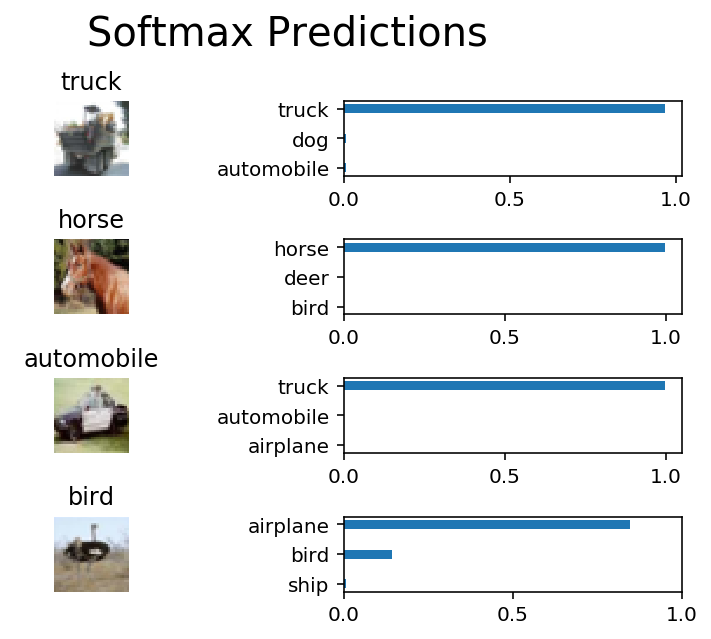

In [31]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf
import pickle
import helper
import random

# Set batch size if not already set
try:
    if batch_size:
        pass
except NameError:
    batch_size = 64

save_model_path = './image_classification'
n_samples = 4
top_n_predictions = 3

def test_model():
    """
    Test the saved model against the test dataset
    """

    test_features, test_labels = pickle.load(open('preprocess_training.p', mode='rb'))
    loaded_graph = tf.Graph()

    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        
        # Get accuracy in batches for memory limitations
        test_batch_acc_total = 0
        test_batch_count = 0
        
        for train_feature_batch, train_label_batch in helper.batch_features_labels(test_features, test_labels, batch_size):
            test_batch_acc_total += sess.run(
                loaded_acc,
                feed_dict={loaded_x: train_feature_batch, loaded_y: train_label_batch, loaded_keep_prob: 1.0})
            test_batch_count += 1

        print('Testing Accuracy: {}\n'.format(test_batch_acc_total/test_batch_count))

        # Print Random Samples
        random_test_features, random_test_labels = tuple(zip(*random.sample(list(zip(test_features, test_labels)), n_samples)))
        random_test_predictions = sess.run(
            tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n_predictions),
            feed_dict={loaded_x: random_test_features, loaded_y: random_test_labels, loaded_keep_prob: 1.0})
        helper.display_image_predictions(random_test_features, random_test_labels, random_test_predictions)


test_model()

## Why 50-80% Accuracy?
You might be wondering why you can't get an accuracy any higher. First things first, 50% isn't bad for a simple CNN.  Pure guessing would get you 10% accuracy. That's because there are many more techniques that can be applied to your model and we recemmond that once you are done with this project, you explore!

## Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook.  Save the notebook file as "image_classification.ipynb" and save it as a HTML file under "File" -> "Download as".  Include the "helper.py" and "problem_unittests.py" files in your submission.